<a href="https://colab.research.google.com/github/MustafaGhaziTalab/MCSD2123-01/blob/main/MCSD2123-01%20/README.md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import warnings

# Ignore deprecation warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


!pip install --upgrade pandas mlxtend matplotlib

In [18]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/MustafaGhaziTalab/MCSD2123-01/main/Dataset_A.csv'
df = pd.read_csv(data_url)




In [19]:
# Importing necessary libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Loading the data from GitHub
data_url = 'https://raw.githubusercontent.com/MustafaGhaziTalab/MCSD2123-01/main/Dataset_A.csv'
df = pd.read_csv(data_url)

# Displaying the first few rows of the dataframe to verify the data
print(df.head())

# Exploratory Data Analysis (EDA) - checking for missing values
print(df.isnull().sum())

# Preparing the data for association rule mining
# Converting the data into a list of transactions
grouped = df.groupby('Member_number')['itemDescription'].apply(list).tolist()

# Initializing the Transaction Encoder
te = TransactionEncoder()
te_ary = te.fit_transform(grouped)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Applying the Apriori algorithm to find frequent itemsets with a specified minimum support threshold
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Displaying frequent itemsets
print(frequent_itemsets)

# Generating association rules from frequent itemsets with a specified minimum confidence threshold
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Displaying the association rules
print(rules)

# Sorting rules by confidence and lift to find the most significant ones
sorted_rules = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])

# Displaying sorted rules
print(sorted_rules.head())

# If you encounter any deprecation warnings or other issues, you may need to update your libraries by uncommenting and running the following command:
# !pip install --upgrade pandas mlxtend


   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
Member_number      0
Date               0
itemDescription    0
dtype: int64
      support                               itemsets
0    0.039504                             (UHT-milk)
1    0.112058                                 (beef)
2    0.056804                              (berries)
3    0.036148                            (beverages)
4    0.082623                         (bottled beer)
..        ...                                    ...
347  0.015492            (whole milk, soda, sausage)
348  0.018590  (whole milk, sausage, tropical fruit)
349  0.014717          (whole milk, sausage, yogurt)
350  0.010586     (whole milk, soda, tropical fruit)
351  0.011361   (yogurt, whole milk, tropical fruit)

[352 

Top 10 Most Frequently Purchased Items:
               Item  Frequency
0        whole milk       1545
1  other vegetables       1146
2           sausage        924
3    tropical fruit        879
4        rolls/buns        815
5   root vegetables        729
6      citrus fruit        722
7              soda        651
8       frankfurter        580
9            yogurt        560
Top Association Rules:
                         antecedents   consequents  antecedent support  \
389         (meat, other vegetables)  (whole milk)            0.020139   
336                    (white bread)  (whole milk)            0.026853   
364  (citrus fruit, root vegetables)  (whole milk)            0.028660   
432       (yogurt, other vegetables)  (whole milk)            0.035889   
466                  (soda, sausage)  (whole milk)            0.035889   

     consequent support   support  confidence      lift  leverage  conviction  \
389            0.327137  0.010586    0.525641  1.606794  0.003998    1

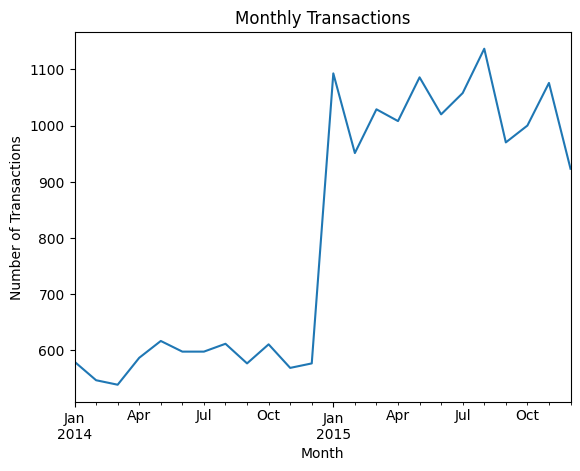

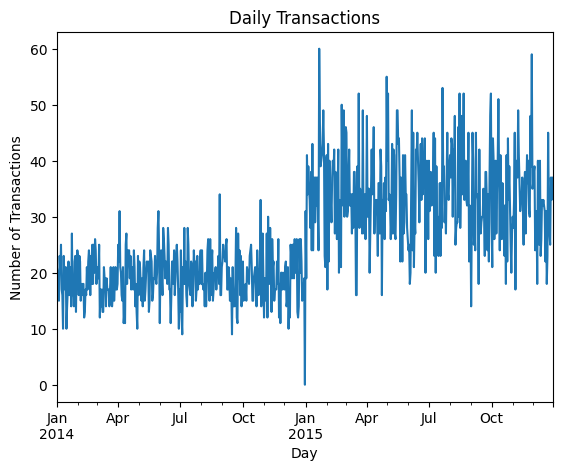

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from datetime import datetime

# Assuming the dataset has already been loaded into a DataFrame 'df'

# Product Demand Analysis
# Calculate the frequency of each item
item_frequencies = df['itemDescription'].value_counts().reset_index()
item_frequencies.columns = ['Item', 'Frequency']

# Display the top 10 most frequently bought items
print("Top 10 Most Frequently Purchased Items:")
print(item_frequencies.head(10))

# Combination Analysis
# Find frequent itemsets and rules
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Display rules sorted by confidence and lift
print("Top Association Rules:")
print(rules.sort_values(['confidence', 'lift'], ascending=[False, False]).head())

# Temporal Analysis
# Add a 'Date' column parsed from the 'Date' column in df
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Analyze transactions over time
monthly_transactions = df.set_index('Date').resample('M').size()
daily_transactions = df.set_index('Date').resample('D').size()

# Display the trend of transactions over months
monthly_transactions.plot(title='Monthly Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# Display the trend of transactions over days
daily_transactions.plot(title='Daily Transactions')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()

# These plots will help us understand on which months or days the transactions are higher


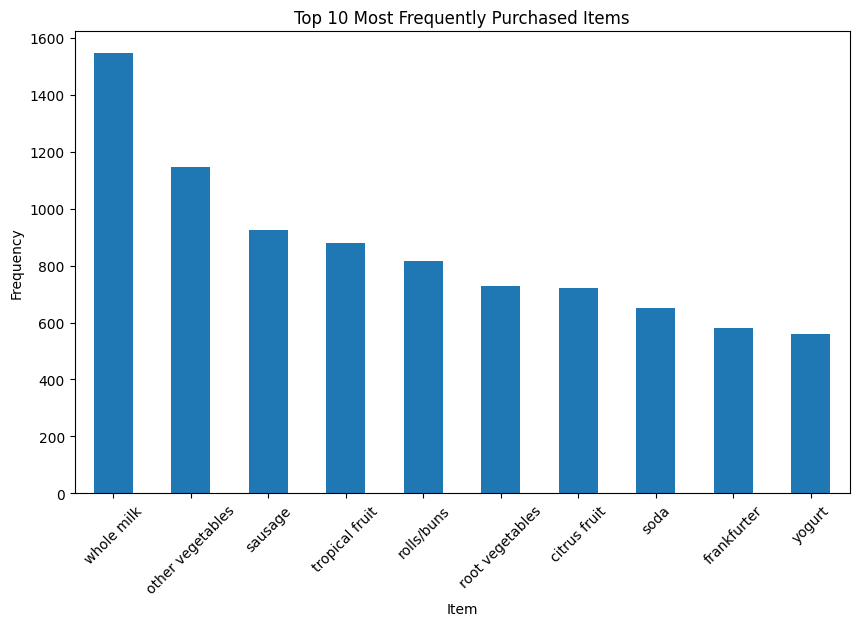

In [21]:
# Assuming 'df' is your DataFrame and 'itemDescription' is the column with the items
top_items = df['itemDescription'].value_counts().head(10)  # Get top 10 items

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar')
plt.title('Top 10 Most Frequently Purchased Items')
plt.ylabel('Frequency')
plt.xlabel('Item')
plt.xticks(rotation=45)
plt.show()


In [22]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/MustafaGhaziTalab/MCSD2123-01/main/Dataset_A.csv'
df = pd.read_csv(data_url)

# Calculate the frequency of each item
item_frequencies = df['itemDescription'].value_counts().reset_index()
item_frequencies.columns = ['Item', 'Frequency']

item_frequencies.head()  # This will display the top 5 items by default



,Item,Frequency
0,whole milk,1545
1,other vegetables,1146
2,sausage,924
3,tropical fruit,879
4,rolls/buns,815


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Item').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Frequency']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Item')):
  _plot_series(series, series_name, i)
  fig.legend(title='Item', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Frequency')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Item')):
  _plot_series(series, series_name, i)
  fig.legend(title='Item', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['Item'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='Item', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Item'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='Frequency', y='Item', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [24]:
import pandas as pd

# Replace 'your_data_url' with the actual URL to the CSV file
data_url = 'https://raw.githubusercontent.com/MustafaGhaziTalab/MCSD2123-01/main/Dataset_A.csv'
df = pd.read_csv(data_url)

# Calculate the frequency of each item
item_frequencies = df['itemDescription'].value_counts()

# Display the item names and their frequencies
print(item_frequencies)


whole milk              1545
other vegetables        1146
sausage                  924
tropical fruit           879
rolls/buns               815
                        ... 
salad dressing             2
pudding powder             2
rubbing alcohol            1
kitchen utensil            1
specialty vegetables       1
Name: itemDescription, Length: 163, dtype: int64
